# Deep Learning - Lab Exercise

### Zaidan Mufaddhal - AIU20092029

### Importing dataset

In [135]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
#import dataset
df = pd.read_csv('C:/Users/zaida/Downloads/dataset_banking/bankingdatasetclassification.csv')

In [116]:
#Print dataset
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


### Preprocessing the dataset

In [118]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32942 non-null  int64 
 1   job          32942 non-null  object
 2   marital      32942 non-null  object
 3   education    32942 non-null  object
 4   default      32942 non-null  object
 5   housing      32942 non-null  object
 6   loan         32942 non-null  object
 7   contact      32942 non-null  object
 8   month        32942 non-null  object
 9   day_of_week  32942 non-null  object
 10  duration     32942 non-null  int64 
 11  campaign     32942 non-null  int64 
 12  poutcome     32942 non-null  object
 13  y            32942 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.8+ MB


In [119]:
df.drop_duplicates(inplace=True)

In [120]:
df.dropna(inplace=True)

In [121]:
df.drop(['pdays', 'previous'], 1, inplace=True)

C:\Users\zaida\AppData\Local\Temp\ipykernel_4968\1086687053.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['pdays', 'previous'], 1, inplace=True)


In [122]:
df.describe()

,age,duration,campaign
count,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804
std,10.403035,258.995259,2.752579
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,98.000000,4918.000000,56.000000


#### Converting object type into numeric

In [123]:
df_obj = df.select_dtypes(include='object').copy()
df_obj.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [124]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          32942 non-null  object
 1   marital      32942 non-null  object
 2   education    32942 non-null  object
 3   default      32942 non-null  object
 4   housing      32942 non-null  object
 5   loan         32942 non-null  object
 6   contact      32942 non-null  object
 7   month        32942 non-null  object
 8   day_of_week  32942 non-null  object
 9   poutcome     32942 non-null  object
 10  y            32942 non-null  object
dtypes: object(11)
memory usage: 3.0+ MB


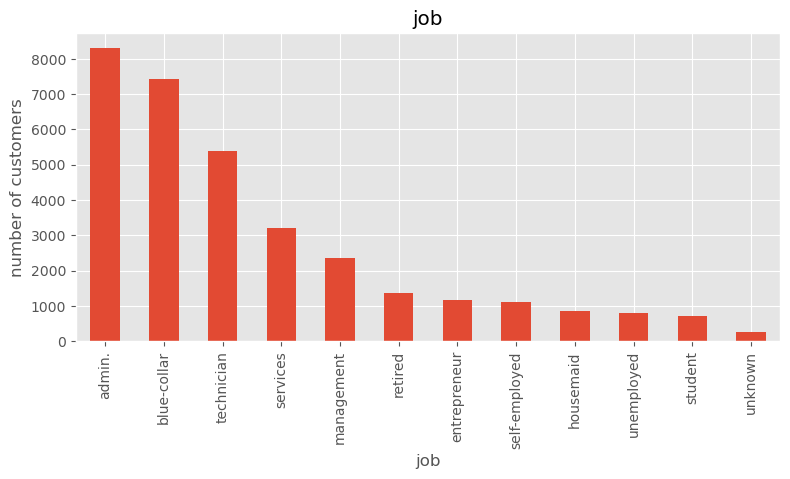

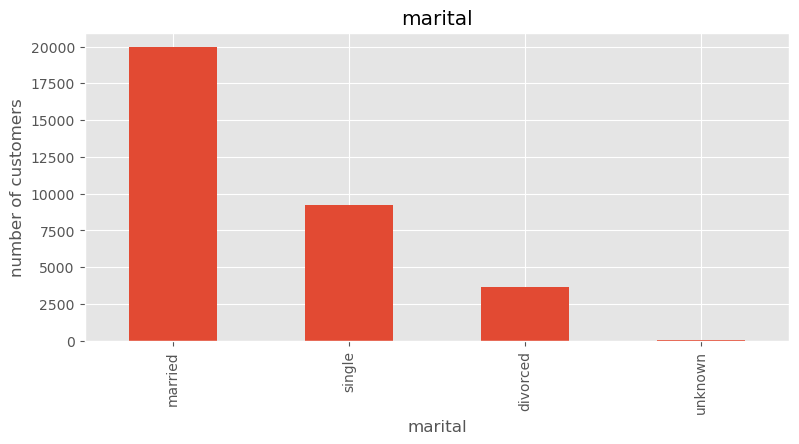

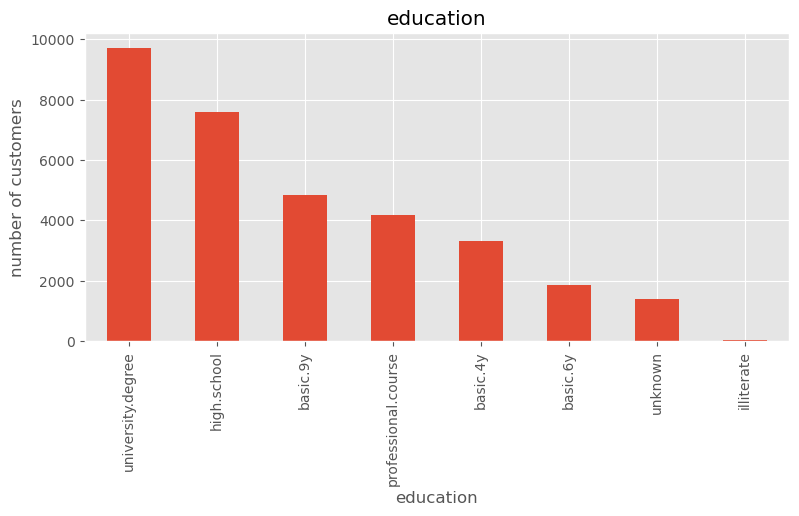

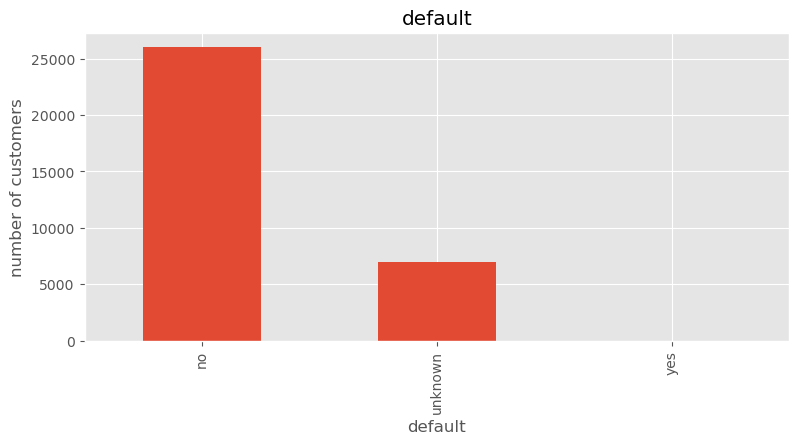

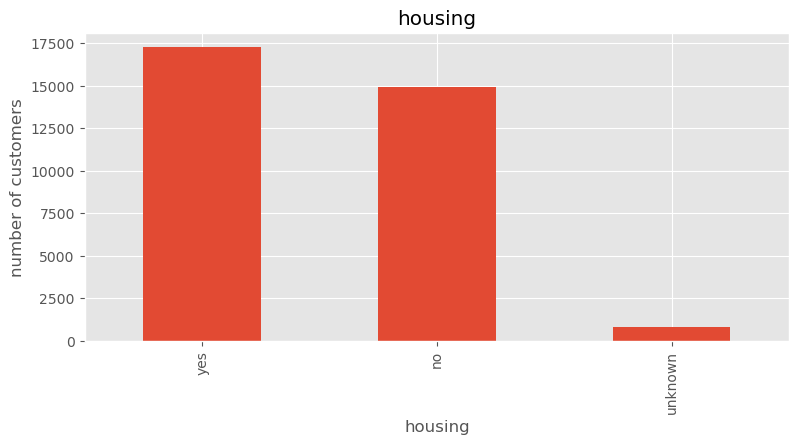

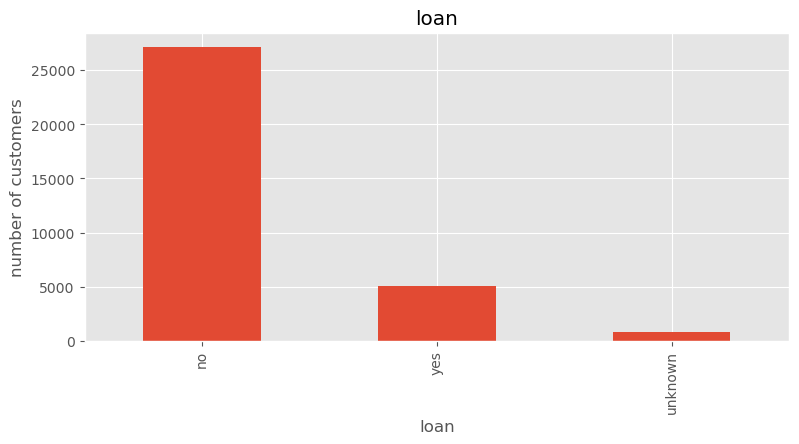

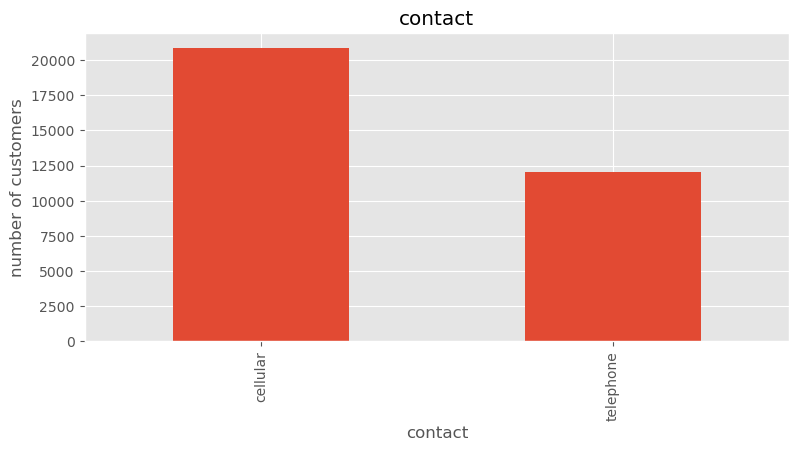

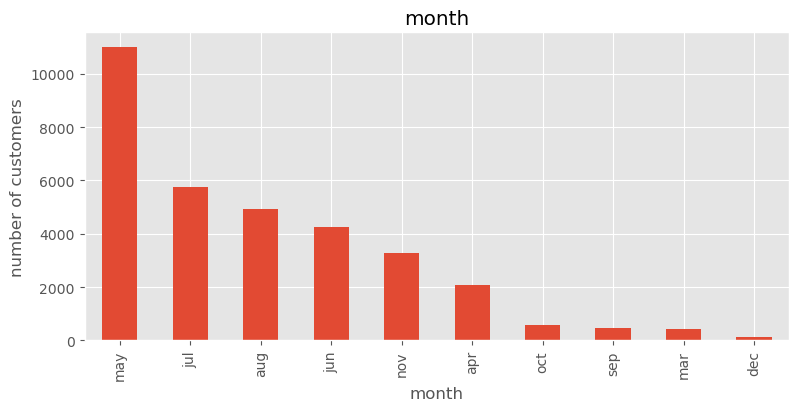

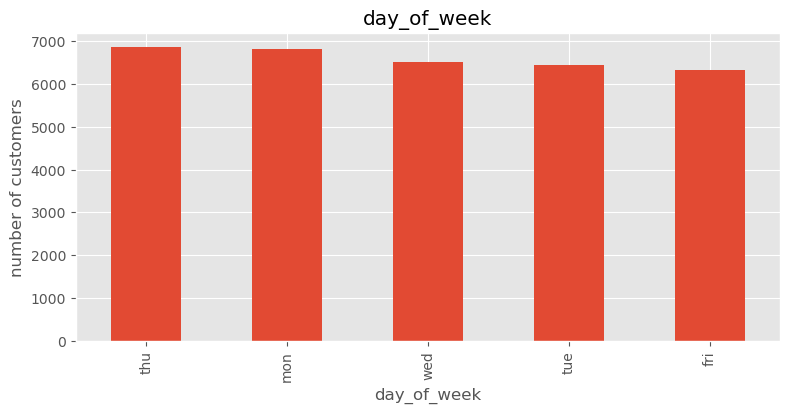

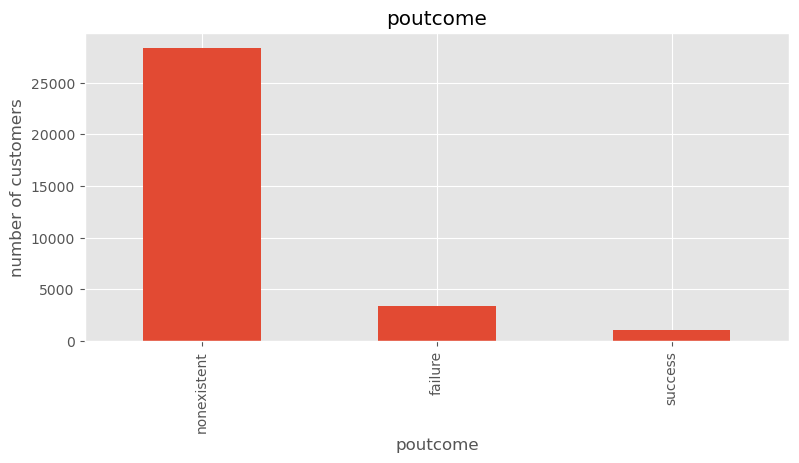

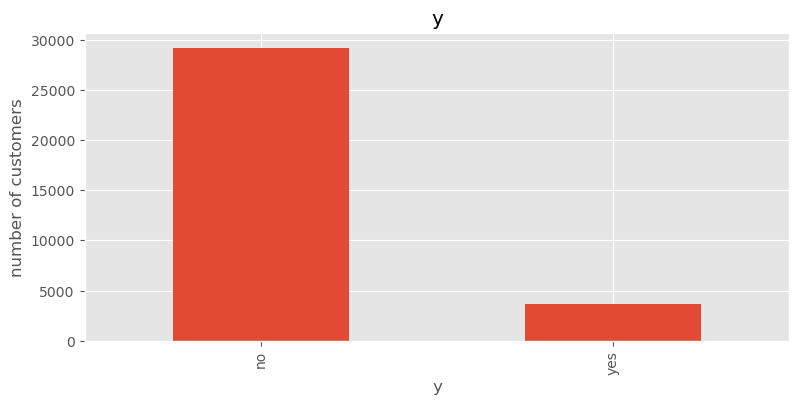

In [125]:
# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in df_obj:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

In [132]:
for column in df_obj:
  mode = df[column].mode()[0]
  df[column]=df[column].replace('unknown', mode)

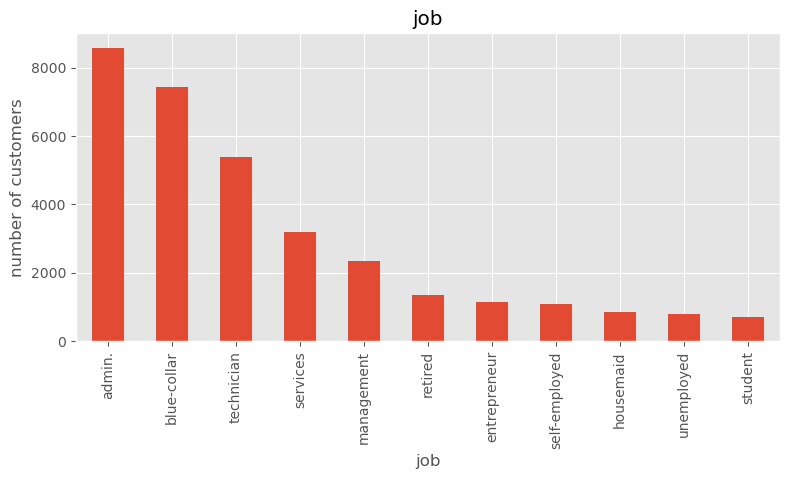

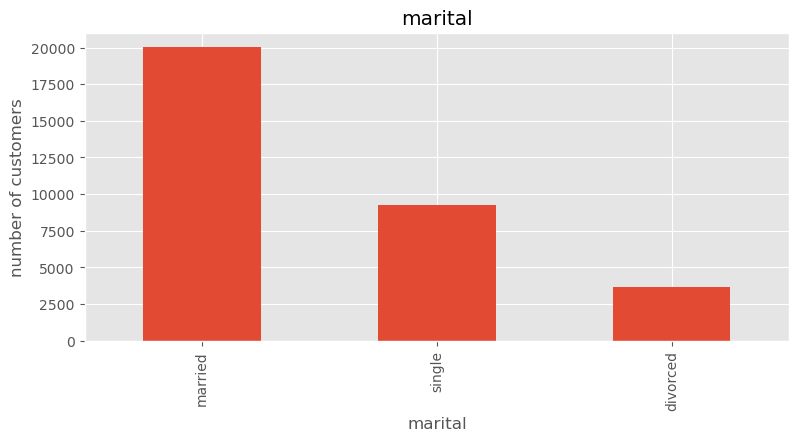

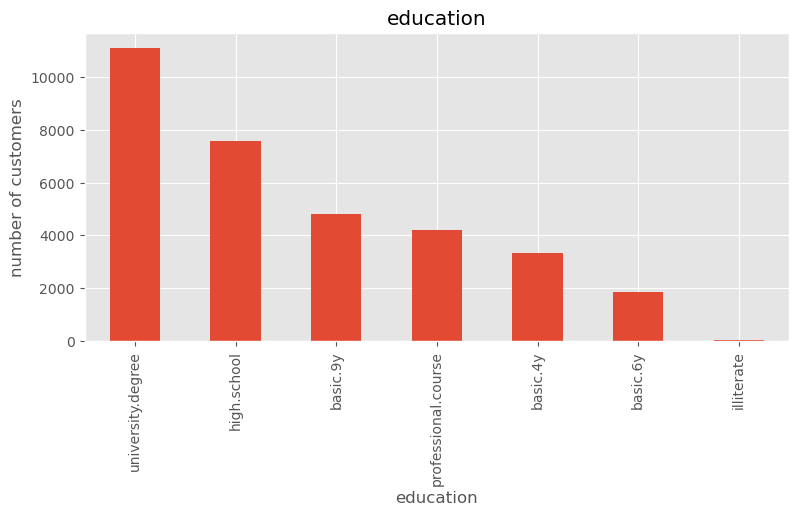

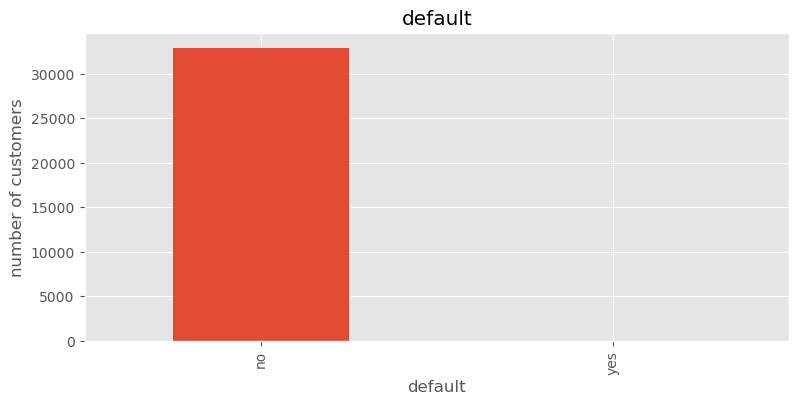

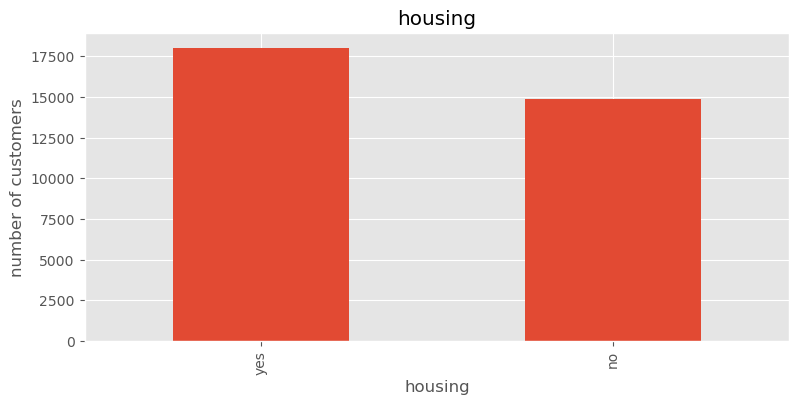

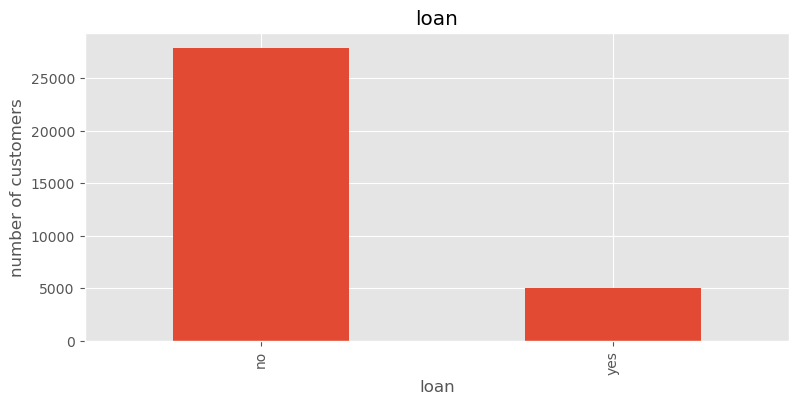

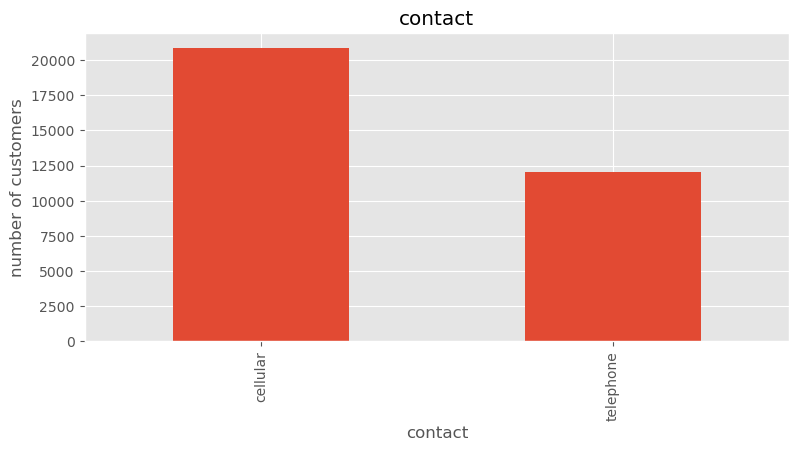

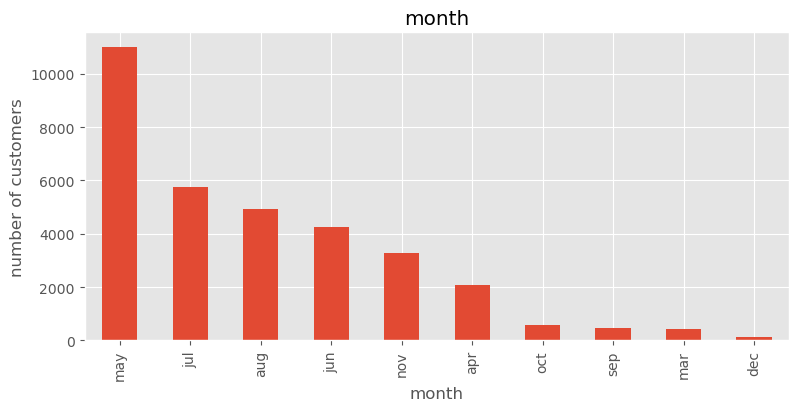

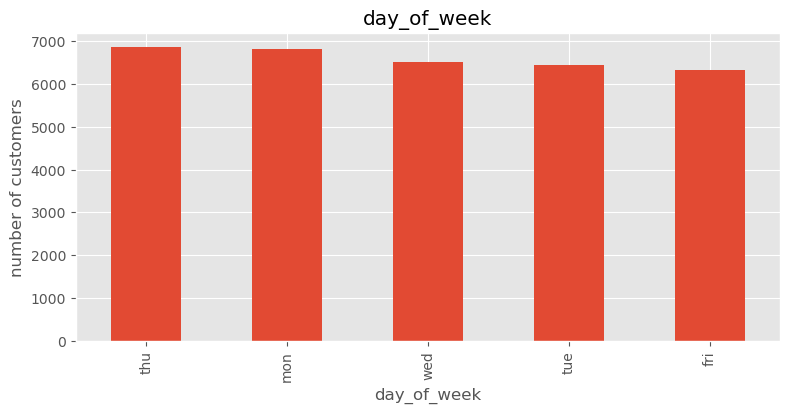

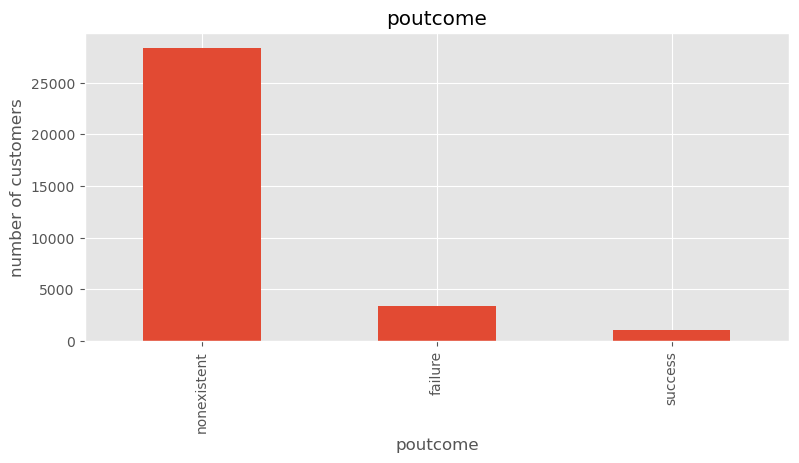

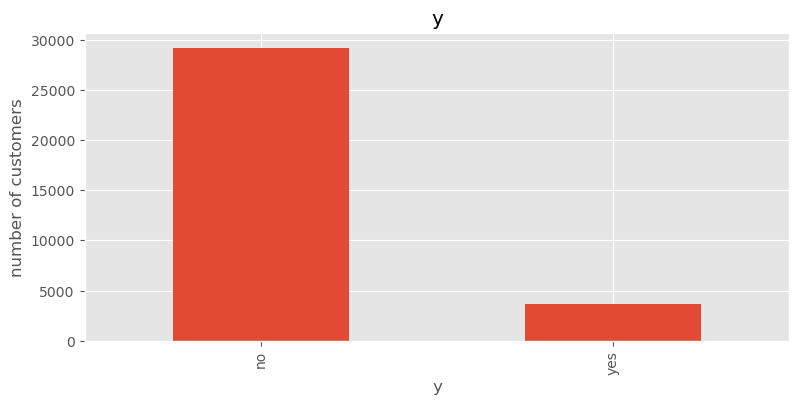

In [133]:
for column in df_obj:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

C:\Users\zaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zaida\anaconda3\lib\si

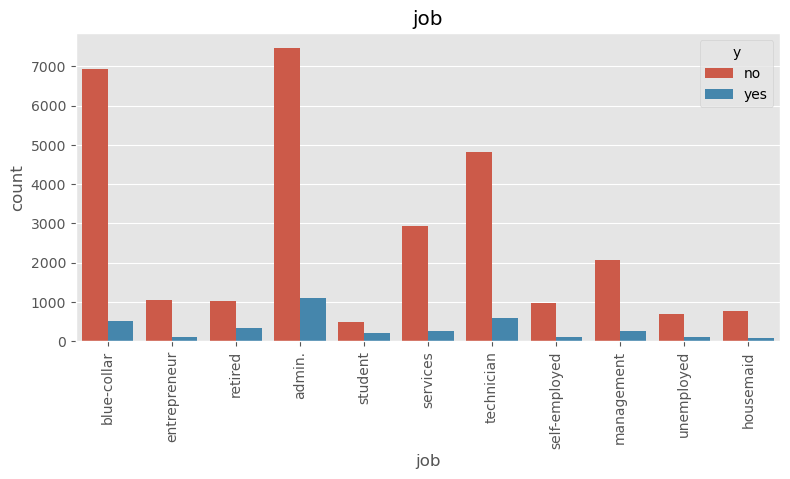

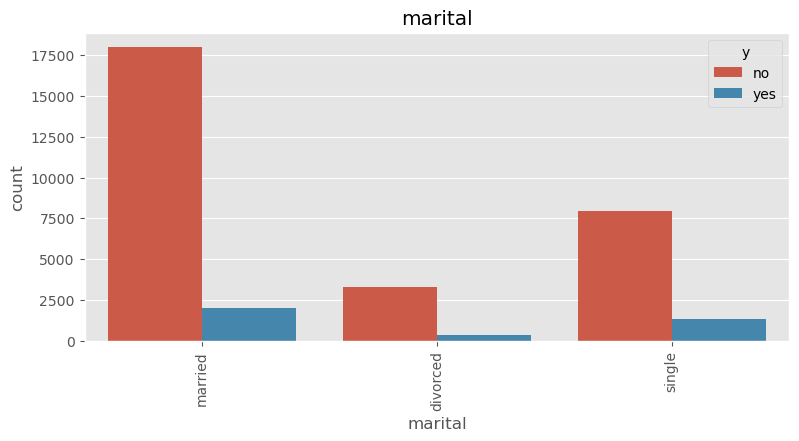

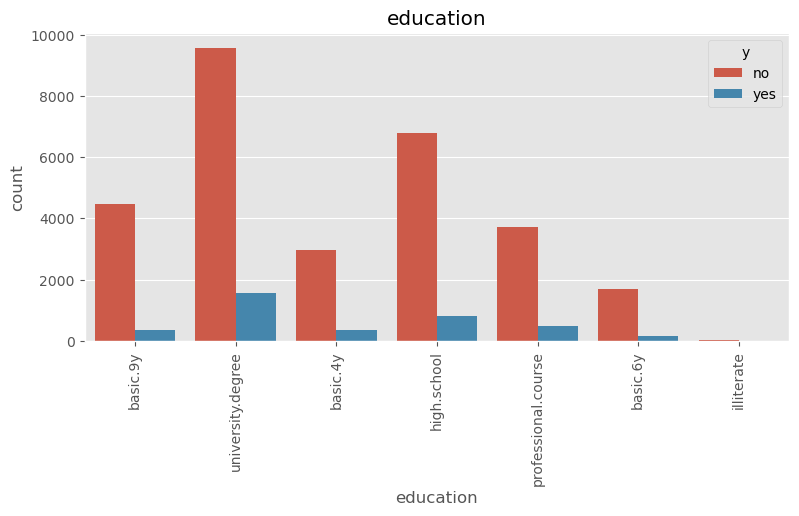

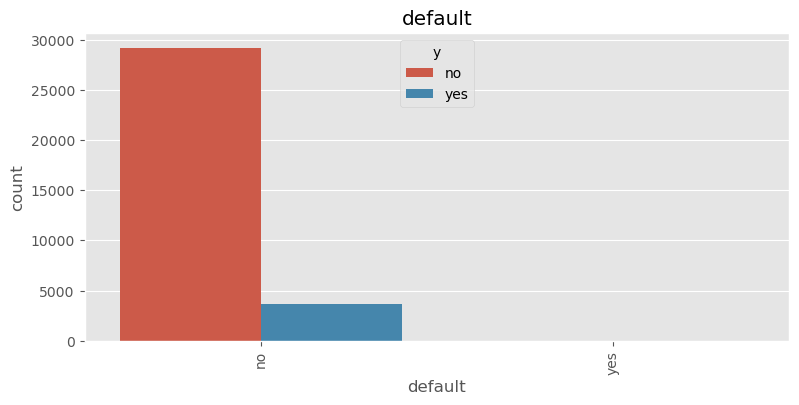

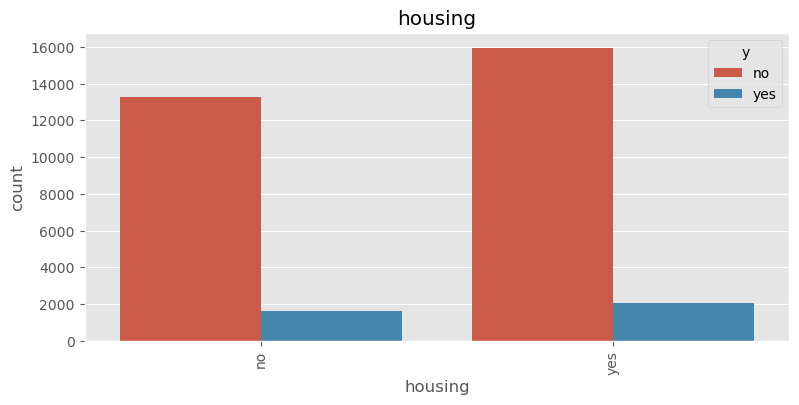

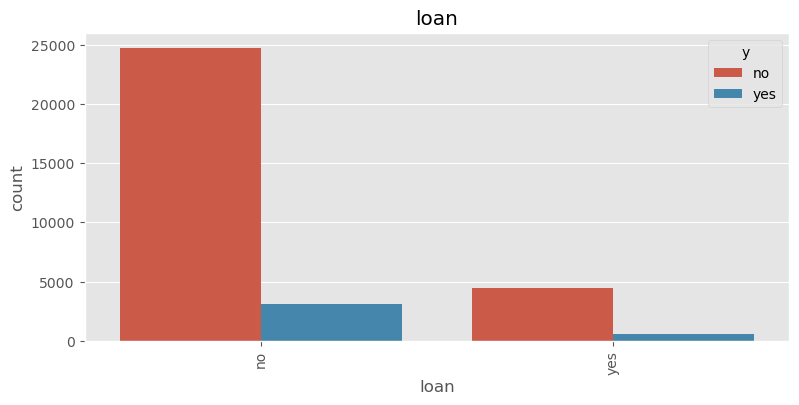

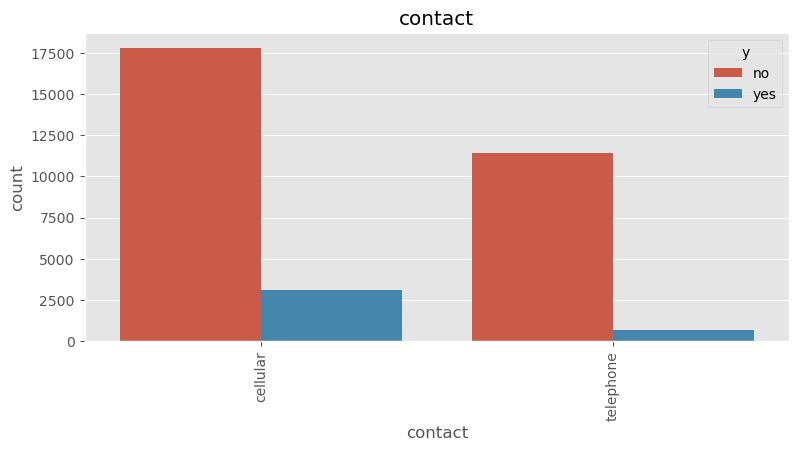

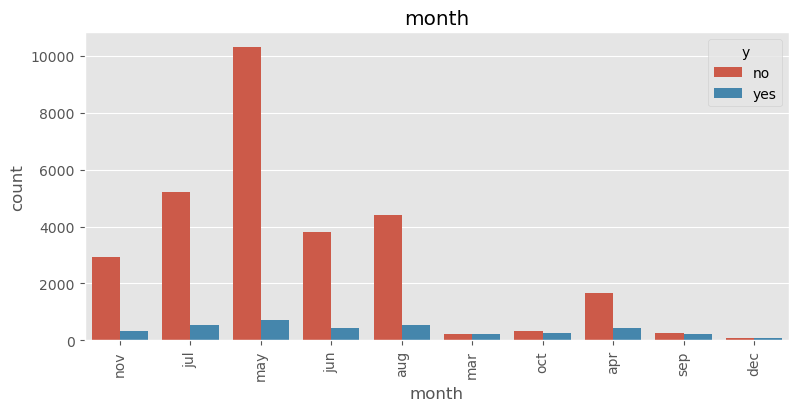

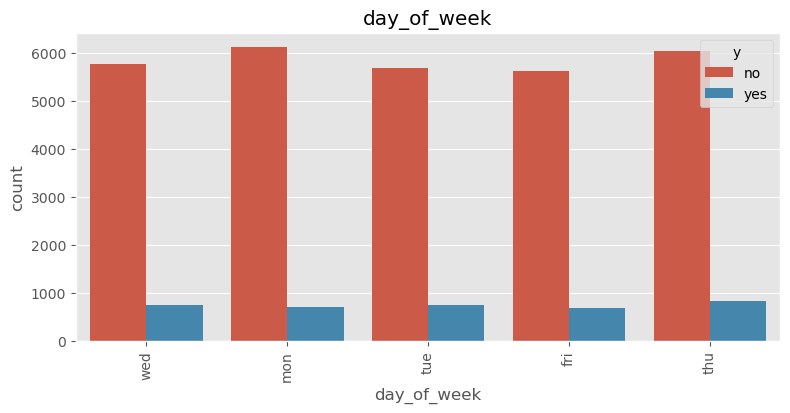

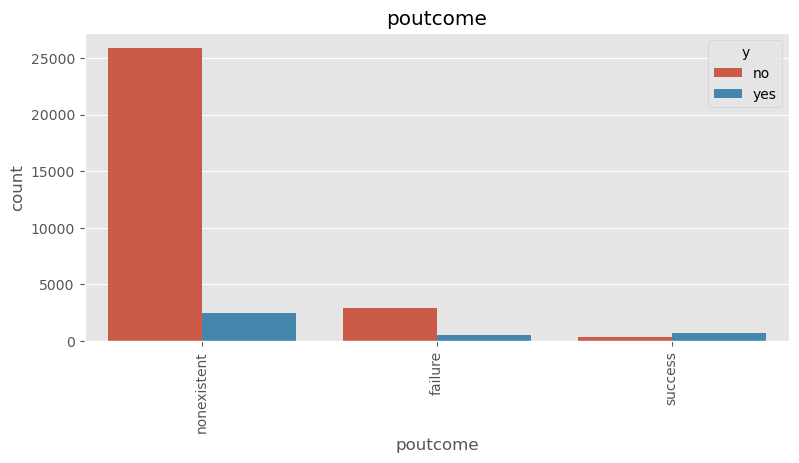

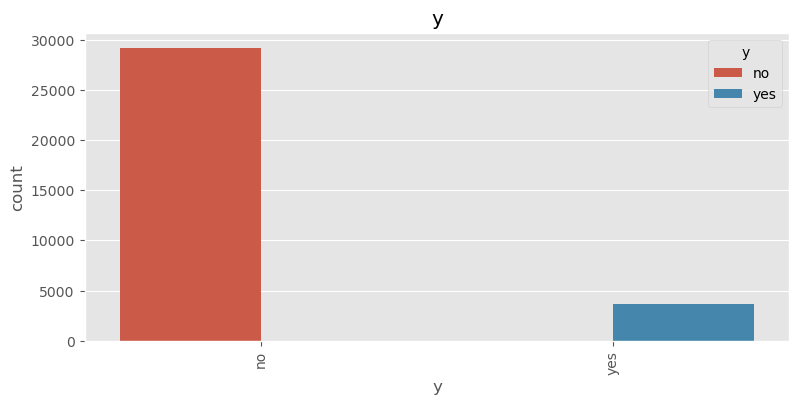

In [136]:
plt.style.use("ggplot")
for column in df_obj:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(df[column], hue=df["y"])
    plt.title(column)    
    plt.xticks(rotation=90)

In [175]:
#encoding categorical data
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'])

In [176]:
df_encoded.head()

,age,duration,campaign,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,no,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,37,202,2,no,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,yes,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,36,120,2,no,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,59,368,2,no,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [188]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age                            32942 non-null  int64 
 1   duration                       32942 non-null  int64 
 2   campaign                       32942 non-null  int64 
 3   y                              32942 non-null  object
 4   job_admin.                     32942 non-null  uint8 
 5   job_blue-collar                32942 non-null  uint8 
 6   job_entrepreneur               32942 non-null  uint8 
 7   job_housemaid                  32942 non-null  uint8 
 8   job_management                 32942 non-null  uint8 
 9   job_retired                    32942 non-null  uint8 
 10  job_self-employed              32942 non-null  uint8 
 11  job_services                   32942 non-null  uint8 
 12  job_student                    32942 non-null  uint8 
 13  j

### Split dataset into test and train

In [177]:
df_encoded

,age,duration,campaign,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,no,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,37,202,2,no,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,yes,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,36,120,2,no,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,59,368,2,no,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,no,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32946,52,64,1,no,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
32947,54,131,4,no,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32948,29,165,1,no,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [148]:
X = df_encoded.drop('y', 1).copy()
Y  = df_encoded['y'].copy()

C:\Users\zaida\AppData\Local\Temp\ipykernel_4968\2097981147.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_encoded.drop('y', 1).copy()


In [149]:
X.head()

,age,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,37,202,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,36,120,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,59,368,2,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [178]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 32942 entries, 0 to 32949
Series name: y
Non-Null Count  Dtype 
--------------  ----- 
32942 non-null  object
dtypes: object(1)
memory usage: 514.7+ KB


In [194]:
#Converting Y data type from Object to Int
Y = Y.map({'yes':1, 'no':0})

In [195]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 32942 entries, 0 to 32949
Series name: y
Non-Null Count  Dtype
--------------  -----
32942 non-null  int64
dtypes: int64(1)
memory usage: 514.7 KB


In [196]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size = 0.3)

In [198]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

In [199]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(23059, 50) (4941, 50) (4942, 50) (23059,) (4941,) (4942,)


### Building and training our first neural network

In [200]:
#import library
import keras
from keras.models import Sequential
from keras.layers import Dense

In [201]:
model = Sequential([Dense(32, activation='relu', input_shape=(50,)),
                   Dense(32, activation='relu'),
                   Dense(1, activation='sigmoid')])

### Filling the best numbers

In [202]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [203]:
hist = model.fit(X_train,Y_train,
                 batch_size=32,epochs=100,
                 validation_data=(X_val,Y_val))

Epoch 1/100
721/721 [==============================] - 5s 3ms/step - loss: 0.4056 - accuracy: 0.8750 - val_loss: 0.4362 - val_accuracy: 0.8326
Epoch 2/100
721/721 [==============================] - 2s 2ms/step - loss: 0.3201 - accuracy: 0.8856 - val_loss: 0.2307 - val_accuracy: 0.9000
Epoch 3/100
721/721 [==============================] - 2s 2ms/step - loss: 0.3019 - accuracy: 0.8927 - val_loss: 0.3179 - val_accuracy: 0.8925
Epoch 4/100
721/721 [==============================] - 1s 2ms/step - loss: 0.2593 - accuracy: 0.8994 - val_loss: 0.3879 - val_accuracy: 0.8462
Epoch 5/100
721/721 [==============================] - 2s 2ms/step - loss: 0.2694 - accuracy: 0.8961 - val_loss: 0.2705 - val_accuracy: 0.8873
Epoch 6/100
721/721 [==============================] - 2s 2ms/step - loss: 0.2589 - accuracy: 0.8957 - val_loss: 0.2262 - val_accuracy: 0.9033
Epoch 7/100
721/721 [==============================] - 2s 2ms/step - loss: 0.2402 - accuracy: 0.9001 - val_loss: 0.2297 - val_accuracy: 0.9049

Epoch 58/100
721/721 [==============================] - 2s 2ms/step - loss: 0.1959 - accuracy: 0.9086 - val_loss: 0.2252 - val_accuracy: 0.9006
Epoch 59/100
721/721 [==============================] - 2s 2ms/step - loss: 0.1968 - accuracy: 0.9095 - val_loss: 0.2275 - val_accuracy: 0.9029
Epoch 60/100
721/721 [==============================] - 2s 2ms/step - loss: 0.1952 - accuracy: 0.9101 - val_loss: 0.2186 - val_accuracy: 0.9065
Epoch 61/100
721/721 [==============================] - 2s 2ms/step - loss: 0.1942 - accuracy: 0.9101 - val_loss: 0.2191 - val_accuracy: 0.9055
Epoch 62/100
721/721 [==============================] - 2s 2ms/step - loss: 0.1959 - accuracy: 0.9093 - val_loss: 0.2222 - val_accuracy: 0.9031
Epoch 63/100
721/721 [==============================] - 2s 2ms/step - loss: 0.1959 - accuracy: 0.9102 - val_loss: 0.2285 - val_accuracy: 0.9047
Epoch 64/100
721/721 [==============================] - 1s 2ms/step - loss: 0.1946 - accuracy: 0.9113 - val_loss: 0.2205 - val_accuracy:

In [204]:
#evaluting on the test set
model.evaluate(X_test,Y_test)[1]

155/155 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9079


0.9079319834709167

### Visualizing loss and accuracy

In [205]:
import matplotlib.pyplot as plt

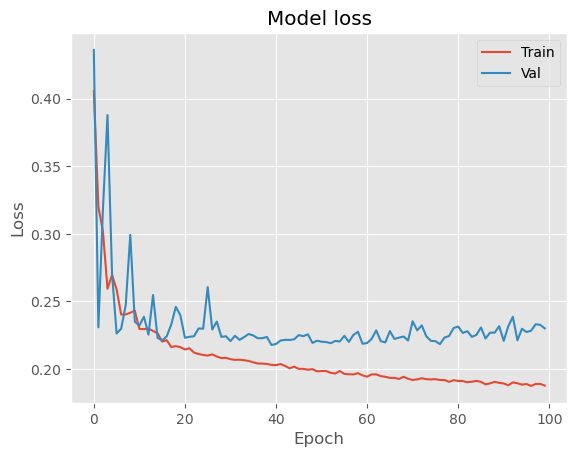

In [206]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

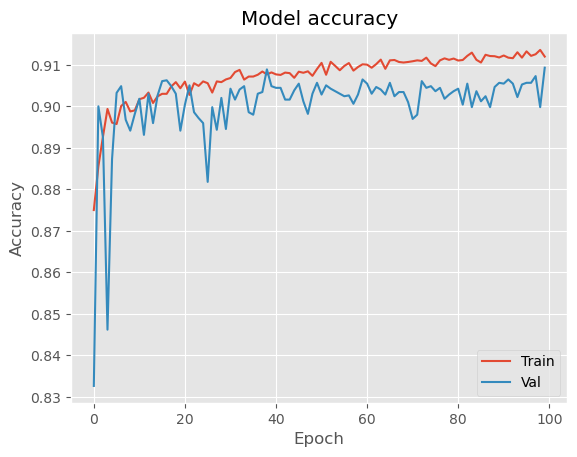

In [207]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()